## Speaker Annalysis

### Problem statement:
#### The objective is to find the best speakers on Flipkart based on the following criteria: price, brand, rating, and discount.


### contents
- Importing reqired libraries

- Scraping the data from "Flipkart.com" website

- Cleaning the data

- Data visualization



In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

##### Note:The Beautiful Soup library in Python makes extracting HTML from web pages easy.


#### Multiple pages Extraction:

In [2]:
Brands = []
prices = []
discounts = []
ratings = []
shipping_charge = []
colors = []
channels = []

for i in range(1,50):
    URL = ("https://www.flipkart.com/search?q=speakers&sid=0pm%2C0o7&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=RECENT&suggestionId=speakers%7CSpeakers&requestId=5aadc235-990c-4bd9-aac6-f45d362e10a6&as-searchtext=speake%27")
    page = requests.get(URL)
    htmlCode = page.text
    soup = BeautifulSoup(htmlCode)
    for container in soup.find_all('div', attrs={'class' :'_4ddWXP'}):
        Brand = container.find('a', attrs={'class' :'s1Q9rs'})
        if Brand is None:
            Brands.append(np.NaN)
        else:
            Brands.append(Brand.text.replace('F','Ferons ').replace('I','I-kall').split()[0])
        price = container.find('div', attrs={'class' :'_30jeq3'})
        if price is None:
            prices.append(np.NaN)
        else:
            prices.append(price.text.replace('₹',' ').replace(',',''))
        discount = container.find('div', attrs={'class' :'_3Ay6Sb'})
        if discount is None:
            discounts.append(np.NaN)
        else:
            discounts.append(discount.text)
        rating = container.find('div', attrs={'class' :'_3LWZlK'})
        if rating is None:
            ratings.append(np.NaN)
        else:
            ratings.append(rating.text)
        shipping = container.find('div', attrs={'class' :'_2Tpdn3'})
        if shipping is None:
            shipping_charge.append(np.NaN)
        else:
            shipping_charge.append(shipping.text) 
        color = container.find('div', attrs={'class' :'_3Djpdu'})
        if color is None:
            colors.append(np.NaN)
        else:
            colors.append(color.text.replace(',',' ').split()[0])
        channel = container.find('div', attrs={'class' :'_3Djpdu'})
        if channel is None:
            channels.append(np.NaN)
        else:
            channels.append(channel.text)


#### Here we use page.status_code to check the website is scrapable or not.

In [3]:
page = requests.get(URL)
page

<Response [200]>

In [4]:
l = []
for i in channels:
    c = re.findall(r",\s([a-zA-z0-9.]+\s[a-zA-Z]+)",str(i))
    if len(c)>0:
        l.append(c[0])
    else:
        l.append(np.NaN)

#### checking if the length of all columns are same.

In [5]:
print(len(shipping_charge))

1960


In [6]:
print(len(channels))

1960


In [7]:
print(len(Brands))

1960


In [8]:
print(len(ratings))

1960


In [9]:
print(len(prices))

1960


In [10]:
print(len(discounts))

1960


#### Creating a Data_Frame.

In [11]:
d = {'Brand': Brands,'Price(In_Rupees)': prices,'Discount':discounts,'Rating': ratings,'Shipping_Charge':shipping_charge,'Color': colors,'Channel': l}

In [12]:
Data_Frame = pd.DataFrame(d)

In [13]:
Data_Frame

,Brand,Price(In_Rupees),Discount,Rating,Shipping_Charge,Color,Channel
0,boAt,2499,64% off,4.4,Free delivery,Navy,Stereo Channel
1,boAt,4499,43% off,4,Free delivery,Red,Stereo Channel
2,I-kallntex,2599,13% off,3.8,Free delivery,Black,4.1 Channel
3,boAt,1299,56% off,4.4,Free delivery,Blue,Stereo Channel
4,Mivi,849,57% off,4.2,Free delivery,Blue,Mono Channel
...,...,...,...,...,...,...,...
1955,ZEBRONI-kallCS,1999,42% off,4,Free delivery,Black,Stereo Channel
1956,boAt,3999,42% off,4.4,Free delivery,Black,Stereo Channel
1957,etmax,997,56% off,3.8,Free delivery,Black,Stereo Channel
1958,boAt,1999,33% off,4,Free delivery,Black,Stereo Channel


In [14]:
a =[]
for i in prices:
     a.append(int(i))
Data_Frame['Price(In-Rupees)']= a


#### Changing price column object type into int type.

In [15]:
b = []
for i in ratings:
    b.append(float(i))
Data_Frame["ratings"] = b    

#### changing rating column object type to float type.

In [16]:
c = []
for i in discounts:
    d = re.findall(r"\d+", i)
    if len(d)>0:
        c.append(d[0])
    else:
        c.append(np.NaN)

#### Here, Discount column contains the (%) symbol so to remove this special charater we used regular expression.

In [17]:
e = []
for i in c:
    e.append(int(i))
Data_Frame['c'] = e  

#### Changing Discount column object type to int type.

In [18]:
d = {'Brand': Brands,'Price(In_Rupees)': a,'Discount in percentage':e,'Rating': b,'Shipping_Charge':shipping_charge,'Color': colors,'Channel': l}

In [19]:
Data_Frame = pd.DataFrame(d)

In [20]:
Data_Frame

,Brand,Price(In_Rupees),Discount in percentage,Rating,Shipping_Charge,Color,Channel
0,boAt,2499,64,4.4,Free delivery,Navy,Stereo Channel
1,boAt,4499,43,4.0,Free delivery,Red,Stereo Channel
2,I-kallntex,2599,13,3.8,Free delivery,Black,4.1 Channel
3,boAt,1299,56,4.4,Free delivery,Blue,Stereo Channel
4,Mivi,849,57,4.2,Free delivery,Blue,Mono Channel
...,...,...,...,...,...,...,...
1955,ZEBRONI-kallCS,1999,42,4.0,Free delivery,Black,Stereo Channel
1956,boAt,3999,42,4.4,Free delivery,Black,Stereo Channel
1957,etmax,997,56,3.8,Free delivery,Black,Stereo Channel
1958,boAt,1999,33,4.0,Free delivery,Black,Stereo Channel


In [21]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   1960 non-null   object 
 1   Price(In_Rupees)        1960 non-null   int64  
 2   Discount in percentage  1960 non-null   int64  
 3   Rating                  1859 non-null   float64
 4   Shipping_Charge         1960 non-null   object 
 5   Color                   1960 non-null   object 
 6   Channel                 1904 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 107.3+ KB


#### Checking total number of null values present in each column.

In [22]:
Data_Frame.isna().sum()

Brand                       0
Price(In_Rupees)            0
Discount in percentage      0
Rating                    101
Shipping_Charge             0
Color                       0
Channel                    56
dtype: int64

####  Here, filling the null value present in column - 'Channel' with mode of channel as it is categorical column.

In [23]:
Data_Frame['Channel'] = Data_Frame['Channel'].fillna(Data_Frame['Channel'].mode()[0])

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

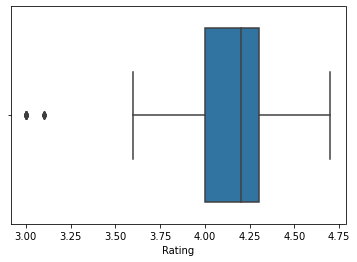

In [25]:
# checking outlier in Rating column
sns.boxplot(Data_Frame['Rating'])

In [65]:
# handling outliers:
s=df['Rating'].quantile(0.25)
print("Q1:",s)# this is Q1.
s1=df['Rating'].quantile(0.75)
print("Q3:",s1)# this is Q2.
#now find IQR=Q3-Q1.
IQR=s1-s
print("IQR:",IQR)#this is IQR.
s2 = s-1.5*IQR # this is for < (-veoutlier)
print(s2)
s3= s1+1.5*IQR # this is for > (+veoutlier)
print(s3)


Q1: 4.0
Q3: 4.3
IQR: 0.2999999999999998
3.5500000000000003
4.75


In [26]:
Data_Frame['Rating'].replace('0.0',np.nan,inplace=True)

#### Since we observed that Rating column has outliers so filling null values with median of Rating because median is not affected by outliers.

In [27]:
Data_Frame['Rating'] = Data_Frame['Rating'].fillna(Data_Frame['Rating'].median())

In [28]:
Data_Frame

,Brand,Price(In_Rupees),Discount in percentage,Rating,Shipping_Charge,Color,Channel
0,boAt,2499,64,4.4,Free delivery,Navy,Stereo Channel
1,boAt,4499,43,4.0,Free delivery,Red,Stereo Channel
2,I-kallntex,2599,13,3.8,Free delivery,Black,4.1 Channel
3,boAt,1299,56,4.4,Free delivery,Blue,Stereo Channel
4,Mivi,849,57,4.2,Free delivery,Blue,Mono Channel
...,...,...,...,...,...,...,...
1955,ZEBRONI-kallCS,1999,42,4.0,Free delivery,Black,Stereo Channel
1956,boAt,3999,42,4.4,Free delivery,Black,Stereo Channel
1957,etmax,997,56,3.8,Free delivery,Black,Stereo Channel
1958,boAt,1999,33,4.0,Free delivery,Black,Stereo Channel


In [29]:
Data_Frame.isna().sum()

Brand                     0
Price(In_Rupees)          0
Discount in percentage    0
Rating                    0
Shipping_Charge           0
Color                     0
Channel                   0
dtype: int64

In [30]:
Data_Frame.to_csv("c:\\Users\\dell\\Project_Speakers.csv")

In [43]:
df = pd.read_csv('Project_Speakers.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1960 non-null   int64  
 1   Brand                   1960 non-null   object 
 2   Price(In_Rupees)        1960 non-null   int64  
 3   Discount in percentage  1960 non-null   int64  
 4   Rating                  1960 non-null   float64
 5   Shipping_Charge         1960 non-null   object 
 6   Color                   1960 non-null   object 
 7   Channel                 1960 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 122.6+ KB


In [122]:
df.drop(['Unnamed: 0'],axis =1,inplace = True)

In [123]:
df

,Brand,Price(In_Rupees),Discount in percentage,Rating,Shipping_Charge,Color,Channel
0,boAt,2499,64,4.4,Free delivery,Navy,Stereo Channel
1,boAt,4499,43,4.0,Free delivery,Red,Stereo Channel
2,I-kallntex,2599,13,3.8,Free delivery,Black,4.1 Channel
3,boAt,1299,56,4.4,Free delivery,Blue,Stereo Channel
4,Mivi,849,57,4.2,Free delivery,Blue,Mono Channel
...,...,...,...,...,...,...,...
1955,ZEBRONI-kallCS,1999,42,4.0,Free delivery,Black,Stereo Channel
1956,boAt,3999,42,4.4,Free delivery,Black,Stereo Channel
1957,etmax,997,56,3.8,Free delivery,Black,Stereo Channel
1958,boAt,1999,33,4.0,Free delivery,Black,Stereo Channel


In [47]:
df.isna().sum()

Brand                     0
Price(In_Rupees)          0
Discount in percentage    0
Rating                    0
Shipping_Charge           0
Color                     0
Channel                   0
dtype: int64

In [40]:
#df.nunique()

In [48]:
df.columns

Index(['Brand', 'Price(In_Rupees)', 'Discount in percentage', 'Rating',
       'Shipping_Charge', 'Color', 'Channel'],
      dtype='object')

In [49]:
df.head()

,Brand,Price(In_Rupees),Discount in percentage,Rating,Shipping_Charge,Color,Channel
0,boAt,2499,64,4.4,Free delivery,Navy,Stereo Channel
1,boAt,4499,43,4.0,Free delivery,Red,Stereo Channel
2,I-kallntex,2599,13,3.8,Free delivery,Black,4.1 Channel
3,boAt,1299,56,4.4,Free delivery,Blue,Stereo Channel
4,Mivi,849,57,4.2,Free delivery,Blue,Mono Channel


In [50]:
df.tail()

,Brand,Price(In_Rupees),Discount in percentage,Rating,Shipping_Charge,Color,Channel
1955,ZEBRONI-kallCS,1999,42,4.0,Free delivery,Black,Stereo Channel
1956,boAt,3999,42,4.4,Free delivery,Black,Stereo Channel
1957,etmax,997,56,3.8,Free delivery,Black,Stereo Channel
1958,boAt,1999,33,4.0,Free delivery,Black,Stereo Channel
1959,KSD,989,50,3.8,Free delivery,Black,5.0 Channel


In [51]:
df.describe()

,Price(In_Rupees),Discount in percentage,Rating
count,1960.000000,1960.000000,1960.000000
mean,2179.765306,49.589796,4.136633
std,1777.029402,13.821996,0.240925
min,379.000000,13.000000,3.000000
25%,989.000000,42.000000,4.000000
50%,1699.000000,50.000000,4.200000
75%,2999.000000,56.000000,4.300000
max,9999.000000,83.000000,4.700000


In [52]:
df.shape

(1960, 7)

#### Checking unique values present in column - 'Brand'.

In [53]:
df['Brand'].unique()

array(['boAt', 'I-kallntex', 'Mivi', 'etmax', 'Ferons', 'Wings', 'fire',
       'ZEBRONI-kallCS', 'Runixx', 'I-kall', 'Gizmore', 'JBL', 'Choose',
       'ghar', 'Google', 'Vox', 'reason', 'NEFerons', 'PHI-kallLI-kallPS',
       'JOKI-kallN', 'KSD', 'Zavia', 'Tiger', 'Happysome', 'BUNAS'],
      dtype=object)

#### Checking count of total values present in column - 'Brand'.

In [54]:
df['Brand'].value_counts()

boAt                 490
Mivi                 273
ZEBRONI-kallCS       251
Gizmore              149
Ferons               147
JBL                  119
etmax                 70
I-kall                51
I-kallntex            49
Vox                   49
fire                  31
Google                28
Choose                28
Wings                 28
ghar                  26
Runixx                25
reason                24
Zavia                 24
PHI-kallLI-kallPS     21
JOKI-kallN            21
KSD                   17
BUNAS                 17
NEFerons              13
Happysome              5
Tiger                  4
Name: Brand, dtype: int64

In [55]:
df['Shipping_Charge'].unique()

array(['Free delivery', 'Bank Offer'], dtype=object)

In [56]:
df['Shipping_Charge'].value_counts()

Free delivery    1911
Bank Offer         49
Name: Shipping_Charge, dtype: int64

In [57]:
df['Color'].unique()

array(['Navy', 'Red', 'Black', 'Blue', 'Premium', 'Multicolor', 'Space',
       'Green', 'Rampant', 'Charcoal', 'Grey', 'Light', 'Army'],
      dtype=object)

In [58]:
df['Color'].value_counts()

Black         1288
Blue           189
Red            132
Premium         70
Space           49
Green           49
Grey            49
Multicolor      32
Navy            28
Rampant         28
Charcoal        28
Light           13
Army             5
Name: Color, dtype: int64

In [59]:
df['Channel'].unique()

array(['Stereo Channel', '4.1 Channel', 'Mono Channel', '2.1 Channel',
       '2.0 Channel', '2.2 Channel', '7.1 Channel', 'random color',
       '5.2 Channel', '5.0 Channel'], dtype=object)

In [85]:
df = df[df.Channel!='random color']

In [89]:
df['Channel'].value_counts()

Stereo Channel    927
Mono Channel      315
2.0 Channel       238
2.1 Channel       140
2.2 Channel        98
7.1 Channel        98
4.1 Channel        77
5.2 Channel        24
5.0 Channel        17
Name: Channel, dtype: int64

In [90]:
df['Rating'].value_counts()

4.2    485
4.4    346
4.3    333
3.9    196
4.0    191
3.8    164
4.1    132
3.6     49
4.7     20
3.0     13
3.1      5
Name: Rating, dtype: int64

#### Extracting categorical columns: 

In [63]:
a = df.select_dtypes(exclude='number')
a

,Brand,Shipping_Charge,Color,Channel
0,boAt,Free delivery,Navy,Stereo Channel
1,boAt,Free delivery,Red,Stereo Channel
2,I-kallntex,Free delivery,Black,4.1 Channel
3,boAt,Free delivery,Blue,Stereo Channel
4,Mivi,Free delivery,Blue,Mono Channel
...,...,...,...,...
1955,ZEBRONI-kallCS,Free delivery,Black,Stereo Channel
1956,boAt,Free delivery,Black,Stereo Channel
1957,etmax,Free delivery,Black,Stereo Channel
1958,boAt,Free delivery,Black,Stereo Channel


#### Extracting numerical columns :

In [64]:
s=df.select_dtypes(include='number')
s

,Price(In_Rupees),Discount in percentage,Rating
0,2499,64,4.4
1,4499,43,4.0
2,2599,13,3.8
3,1299,56,4.4
4,849,57,4.2
...,...,...,...
1955,1999,42,4.0
1956,3999,42,4.4
1957,997,56,3.8
1958,1999,33,4.0


## Univaraite Analysis:

### Numerical

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


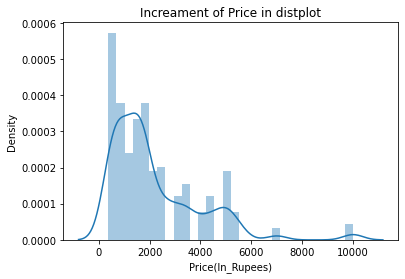

In [66]:
sns.distplot(df['Price(In_Rupees)'],kde=True)
plt.title('Increament of Price in distplot')
plt.show()

## Observation:
### This distplot shows an output that most of the 'Speakers' price increment ranges from 0 - 5000 and maximum price of speaker range is between 500 to 2000


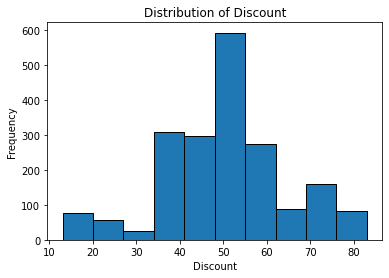

In [68]:
plt.hist(df['Discount in percentage'],bins = 10, edgecolor = 'black')
plt.title("Distribution of Discount")
plt.xlabel("Discount")
plt.ylabel("Frequency")
plt.show()


## Observation
### The  most of the product has 50% discount in prices.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


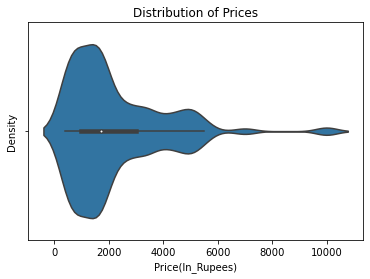

In [69]:

plt.title('Distribution of Prices')
plt.ylabel("Density")
sns.violinplot(df['Price(In_Rupees)'])
plt.show()

### Observation:  The most of the prices is between 700 - 5000


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


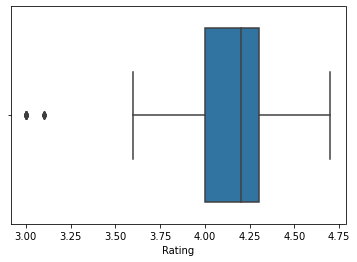

In [70]:
sns.boxplot(df['Rating'],orient = 'v')
plt.show()

## Observation
### This boxplot output represents that 'Rating' has an outliers.

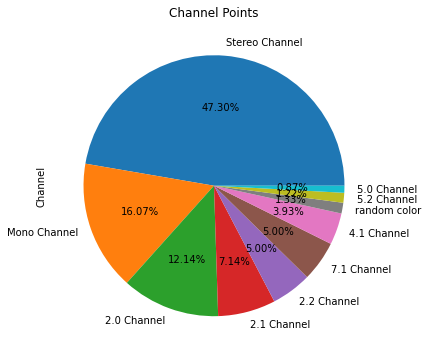

In [71]:
plt.figure(figsize=(6,6))
df["Channel"].value_counts().plot.pie(autopct="%.2f%%")
plt.title("Channel Points")
plt.show()

## Observation: 
 ### Pie chart represents that, channel stereo has high percentage 47.30%.

### categorical:

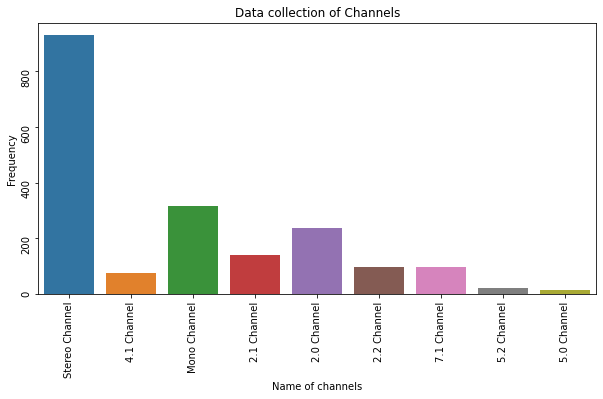

In [91]:
plt.figure(figsize =(10,5))

sns.countplot(x = 'Channel',data = df)
plt.title('Data collection of Channels')
plt.xlabel('Name of channels')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

## Observation
### From this bargraph Stereo channel has more frequency above 800 and 4.1, 5.2,5.0 channels has frequency below 100 .

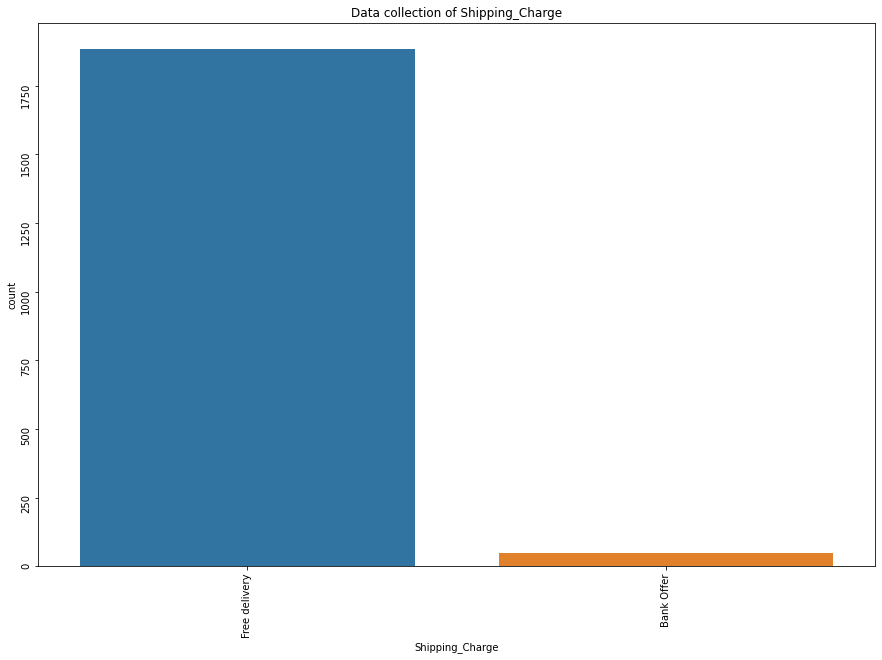

In [92]:
plt.figure(figsize =(15,10))

sns.countplot(x = 'Shipping_Charge',data = df)
plt.title('Data collection of Shipping_Charge')

plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

## Observation:
## In shipping- charge, free delivery has more count than bank offer.

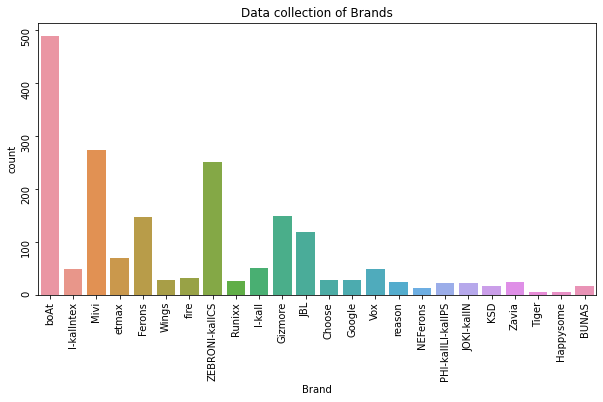

In [93]:
plt.figure(figsize =(10,5))

sns.countplot(x = 'Brand',data = df)
plt.title('Data collection of Brands')

plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

## Observation
### This bargraph represents that brand 'boAt' has more number of count .

## Bi-variate Analysis

### Numerical - Numerical

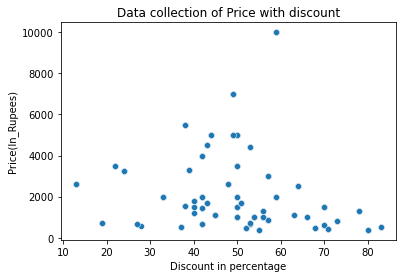

In [94]:
sns.scatterplot(x=df['Discount in percentage'],y=df['Price(In_Rupees)'],data=df)
plt.title("Data collection of Price with discount")

plt.show()

## Observation
### The product prices is low when the discount offer is minimum, which is near to 30%. So, we can say that as price increases then the discount increases.

In [98]:
w = df.select_dtypes(include='number')

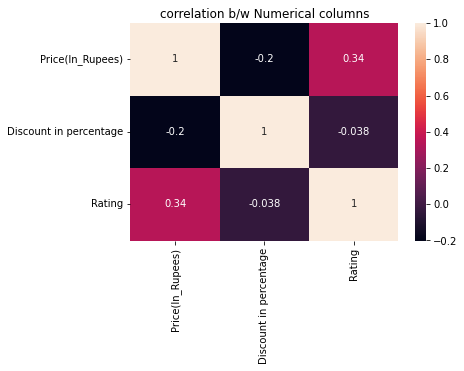

In [100]:
sns.heatmap(w.corr(),annot = True)
plt.title("correlation b/w Numerical columns")
plt.show()

## Observation 
### From this Heatmap we observe that as discount increases Price  decreases , there is a negative correlation

### Numerical - Categorical

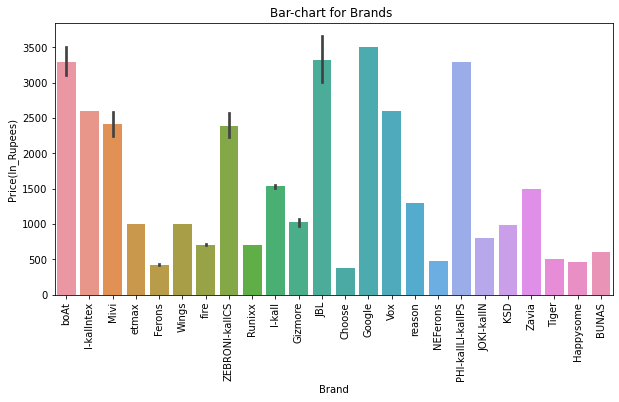

In [102]:
plt.figure(figsize =(10,5))
sns.barplot(x = 'Brand',y = 'Price(In_Rupees)', data = df)
plt.title("Bar-chart for Brands ")
plt.xticks(rotation = 90)
plt.show()

## Observation
### From this barchart we can observe that product of brand Google is more expensive than other brand.

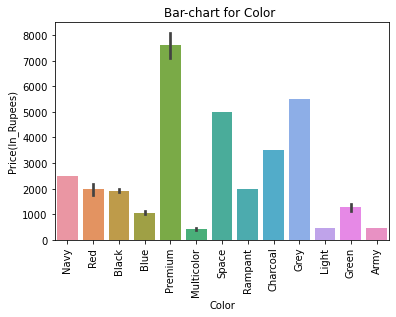

In [103]:
sns.barplot(x = 'Color',y = 'Price(In_Rupees)', data = df)
plt.title("Bar-chart for Color ")
plt.xticks(rotation = 90)
plt.show()

## Observation:
### From barplot we can say that color premium has highest price.

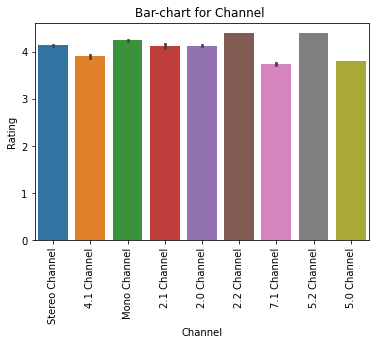

In [104]:
sns.barplot(x = 'Channel',y = 'Rating', data = df)
plt.title("Bar-chart for Channel ")
plt.xticks(rotation = 90)
plt.show()

## Observation:
### Above plot shows an output that all the channel contains approximately same rating, and where 7.1 and 4.1 channel has rating below 4.

### Categorical - Categorical (Bi-variate)

In [105]:
crosstab = pd.crosstab(df['Brand'],df['Channel'])
#crosstab

<Figure size 1440x1080 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

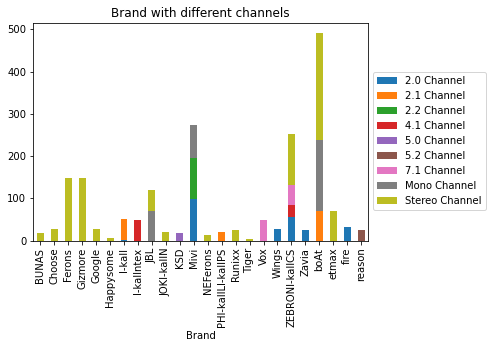

In [107]:
plt.figure(figsize =(20,15))
plt.figure(figsize = (15,8))
crosstab.plot(kind = 'bar',stacked = True)
plt.title('Brand with different channels')
plt.legend(bbox_to_anchor=(1,.8))
plt.show()

## Observation: 
### Brand boAt and Mivi are offering 3 different types of channels, and brand Zebronic offers 4 types of channels.

## Multi-variate Analysis

### PairPlot

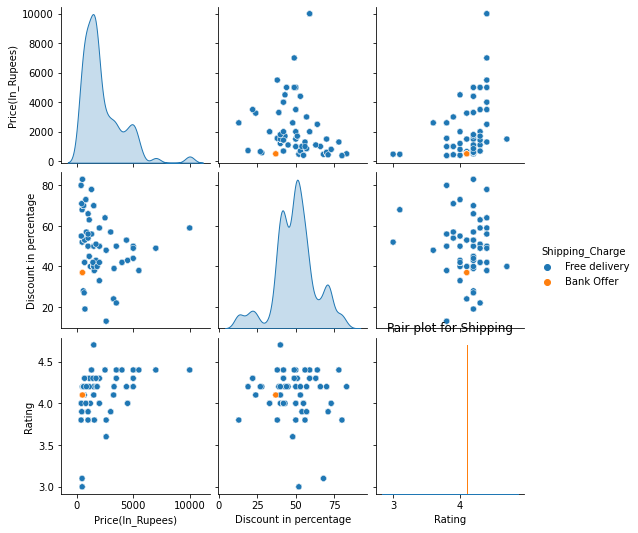

In [108]:
sns.pairplot(data=df,hue = "Shipping_Charge")
plt.title("Pair plot for Shipping")
plt.show()

### Scatter plot

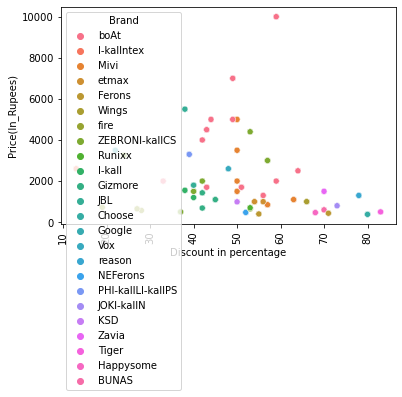

<Figure size 1800x2160 with 0 Axes>

In [114]:
sns.scatterplot(x=df['Discount in percentage'],y=df['Price(In_Rupees)'],hue=df['Brand'],data=df)
plt.xticks(rotation = 90)
plt.figure(figsize=(25,30))
plt.show()

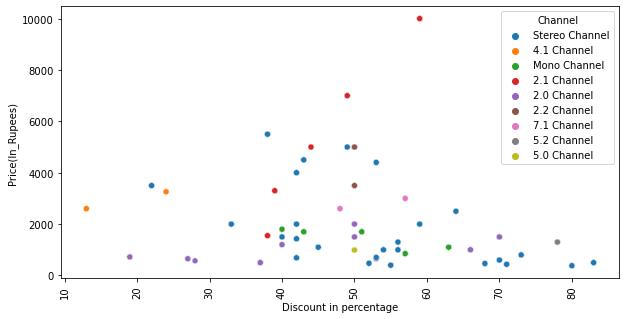

In [115]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Discount in percentage'],y=df['Price(In_Rupees)'],hue=df['Channel'],data=df)
plt.xticks(rotation = 90)

plt.show()

## Observation :
### This graph shows that Stereo channel Speaker has low price and more discount.


### Cat plot

<Figure size 14400x9000 with 0 Axes>

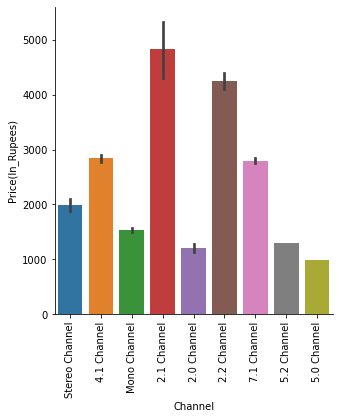

In [117]:
plt.figure(figsize=(200,125))
sns.catplot(x = 'Channel',y = 'Price(In_Rupees)',data = df, kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

## Observation:
### We observe that channel 2.1 has more price above 4000 and 5.0 channel has price near to 1000.

In [124]:
df

,Brand,Price(In_Rupees),Discount in percentage,Rating,Shipping_Charge,Color,Channel
0,boAt,2499,64,4.4,Free delivery,Navy,Stereo Channel
1,boAt,4499,43,4.0,Free delivery,Red,Stereo Channel
2,I-kallntex,2599,13,3.8,Free delivery,Black,4.1 Channel
3,boAt,1299,56,4.4,Free delivery,Blue,Stereo Channel
4,Mivi,849,57,4.2,Free delivery,Blue,Mono Channel
...,...,...,...,...,...,...,...
1955,ZEBRONI-kallCS,1999,42,4.0,Free delivery,Black,Stereo Channel
1956,boAt,3999,42,4.4,Free delivery,Black,Stereo Channel
1957,etmax,997,56,3.8,Free delivery,Black,Stereo Channel
1958,boAt,1999,33,4.0,Free delivery,Black,Stereo Channel


### Scenario 1:

In [129]:

df[(df['Brand'] == 'boAt') & (df['Price(In_Rupees)'] <= 5000) & (df['Color'] == 'Black')]

,Brand,Price(In_Rupees),Discount in percentage,Rating,Shipping_Charge,Color,Channel
7,boAt,3999,42,4.4,Free delivery,Black,Stereo Channel
9,boAt,1699,51,4.3,Free delivery,Black,Mono Channel
18,boAt,1699,43,4.2,Free delivery,Black,Mono Channel
45,boAt,1699,51,4.3,Free delivery,Black,Mono Channel
50,boAt,1699,43,4.2,Free delivery,Black,Mono Channel
...,...,...,...,...,...,...,...
1898,boAt,1699,43,4.2,Free delivery,Black,Mono Channel
1925,boAt,1699,51,4.3,Free delivery,Black,Mono Channel
1930,boAt,1699,43,4.2,Free delivery,Black,Mono Channel
1956,boAt,3999,42,4.4,Free delivery,Black,Stereo Channel


### Scenario 2:

In [127]:
df[(df['Discount in percentage'] == 50) & (df['Price(In_Rupees)'] <= 4000) & (df['Color'] == 'Black')]

,Brand,Price(In_Rupees),Discount in percentage,Rating,Shipping_Charge,Color,Channel
13,Mivi,1499,50,4.2,Free delivery,Black,2.0 Channel
21,Mivi,1999,50,4.0,Free delivery,Black,2.0 Channel
24,Mivi,3499,50,4.4,Free delivery,Black,2.2 Channel
43,Mivi,1499,50,4.2,Free delivery,Black,2.0 Channel
52,Mivi,1999,50,4.0,Free delivery,Black,2.0 Channel
...,...,...,...,...,...,...,...
1904,Mivi,3499,50,4.4,Free delivery,Black,2.2 Channel
1923,Mivi,1499,50,4.2,Free delivery,Black,2.0 Channel
1932,Mivi,1999,50,4.0,Free delivery,Black,2.0 Channel
1936,Mivi,3499,50,4.4,Free delivery,Black,2.2 Channel
